# Project 5: Predicting Whether Mushrooms are Poisonous or Not

# Introduction:

In this project, the primary aim is to develop a machine learning model that can accurately predict whether a mushroom is edible or poisonous. This task is crucial given the diverse and often ambiguous nature of mushroom species, where misidentification can lead to serious health risks. The project will leverage the Mushroom records dataset, which includes various characteristics of mushrooms to make these predictions.

# Objectives

The objectives of this project are multifaceted and integral to its success. Initially, we will embark on a comprehensive exploratory analysis, aiming to gain a deep understanding of the dataset's features and their interrelationships. This step is crucial for identifying key variables and potential patterns that could inform our predictive modeling. Following this, our focus will shift to data preprocessing, where the dataset will be meticulously prepared for machine learning applications. This includes handling any missing data, appropriately encoding categorical variables, and normalizing the data to ensure consistency and accuracy in our model's inputs. The next phase involves the development and training of various machine learning models tailored for the task of classifying mushrooms as either edible or poisonous. Each model will be critically evaluated, with a keen focus on relevant performance metrics such as accuracy and reliability, to determine the most effective approach for our classification task. Finally, the project culminates with the extraction and interpretation of meaningful insights from our models. This will involve identifying and understanding the key features that most significantly influence mushroom edibility, thus providing valuable knowledge that extends beyond the predictive capability of the models.

In [17]:
# Packages being used:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings('ignore')

# Step 3: Initial Data Exploration 

In [ ]:
# Loading the dataset

In [20]:
mushroom_df = pd.read_csv('mushroom.csv')
mushroom_df.head()

,class=e,class=p,cap-shape=b,cap-shape=c,cap-shape=f,cap-shape=k,cap-shape=s,cap-shape=x,cap-surface=f,cap-surface=g,...,population=s,population=v,population=y,habitat=d,habitat=g,habitat=l,habitat=m,habitat=p,habitat=u,habitat=w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
mushroom_df.shape

(8124, 119)

In [22]:
# Displaying basic info

In [23]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class=e to habitat=w
dtypes: int64(119)
memory usage: 7.4 MB


In [24]:
# Displaying datatypes of each feature

In [25]:
mushroom_df.dtypes

class=e        int64
class=p        int64
cap-shape=b    int64
cap-shape=c    int64
cap-shape=f    int64
               ...  
habitat=l      int64
habitat=m      int64
habitat=p      int64
habitat=u      int64
habitat=w      int64
Length: 119, dtype: object

In [26]:
# Identifying the number of features

In [27]:
num_features = mushroom_df.shape[1]
print(f"The dataset contains {num_features} features.")

The dataset contains 119 features.


In [28]:
# Displaying null values

In [29]:
mushroom_df.isnull().sum()

class=e        0
class=p        0
cap-shape=b    0
cap-shape=c    0
cap-shape=f    0
              ..
habitat=l      0
habitat=m      0
habitat=p      0
habitat=u      0
habitat=w      0
Length: 119, dtype: int64

In [30]:
# Displaying already mentioned missing values from mushroom_info.txt

In [31]:
missing_stalk_root = mushroom_df['stalk-root=?'].sum()
print("Number of missing values in 'stalk-root':", missing_stalk_root)

Number of missing values in 'stalk-root': 2480


In [32]:
# Plotting the missing values

<Axes: >

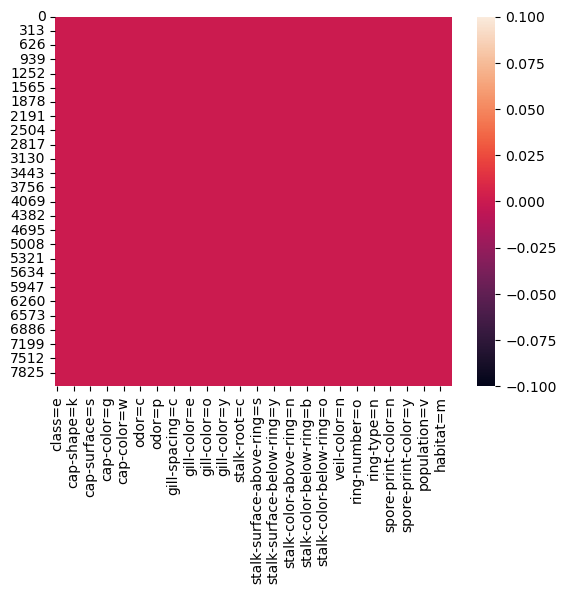

In [33]:
sns.heatmap(mushroom_df.isnull())

# 

# 

# Step 4: Exploratory Data Analysis 

Before jumping in with eda, i would want to combine all classes into their attributes and not have them separately. 
 so, i could plot the distribution of each feature. I want to do this because it will make things easier to look at a 
 single graph for each attribute rather than multiple graphs for each class within an attribute. This also helps in 
 identifying patterns, relationships, and anomalies within each feature.
 
 To combine all classes together, I have to reverse the one hot encoding, which reverts back to its categorical format.

In [34]:
# Load the dataset
mushroom_df_new = pd.read_csv('mushroom.csv')

# Function to reverse one-hot encoding
def reverse_one_hot(df, prefix):
    relevant_cols = df.filter(like=prefix)
    relevant_cols = relevant_cols.apply(pd.to_numeric, errors='coerce')
    df[prefix] = relevant_cols.idxmax(axis=1).apply(lambda x: x.split('=')[1] if x else None)
    df.drop(relevant_cols.columns, axis=1, inplace=True)
    return df

# List of all attribute prefixes based on your attributes list
attributes = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Applying the function to each attribute prefix
for prefix in attributes:
    mushroom_df_new  = reverse_one_hot(mushroom_df_new, prefix)

mushroom_df_new.head()

,class=e,class=p,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,0,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,1,0,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,0,1,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,1,0,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


In [35]:
# Summary of categorical features including the class
for column in mushroom_df_new.columns:
    print(f"--- Feature: {column} ---")
    print(mushroom_df_new[column].value_counts())
    print("\n")

--- Feature: class=e ---
1    4208
0    3916
Name: class=e, dtype: int64


--- Feature: class=p ---
0    4208
1    3916
Name: class=p, dtype: int64


--- Feature: cap-shape ---
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


--- Feature: cap-surface ---
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


--- Feature: cap-color ---
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


--- Feature: bruises ---
f    4748
t    3376
Name: bruises, dtype: int64


--- Feature: odor ---
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


--- Feature: gill-attachment ---
f    7914
a     210
Name: gill-attachment, dtype: int64


--- Feature: gill-spacing ---
c    6812
w    1312
Name: gill-spacing, dtype: int64


--- Feature: gill-size ---
b    5612
n    2512
Name: gill-size, dtype: int64




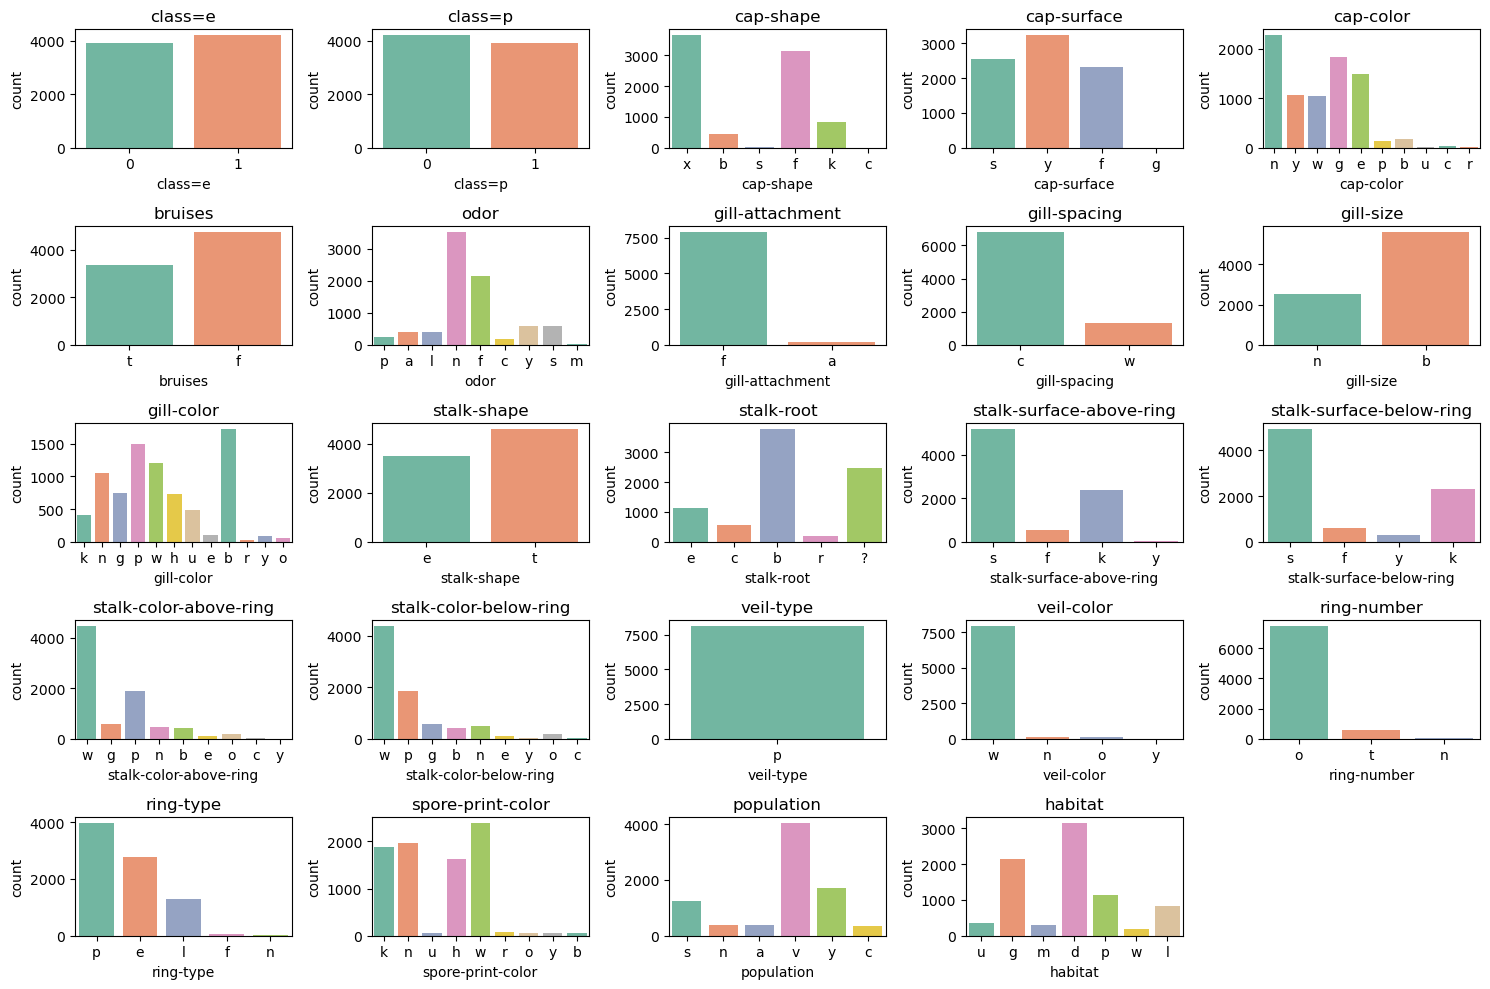

In [36]:
# Set up for matplotlib figure
plt.figure(figsize=(15, 10))

# Create a count plot for each categorical feature
for i, column in enumerate(mushroom_df_new.columns):
    plt.subplot(5, 5, i + 1)  # Adjust the grid dimensions accordingly
    sns.countplot(x=mushroom_df_new[column], palette='Set2')
    plt.title(column)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

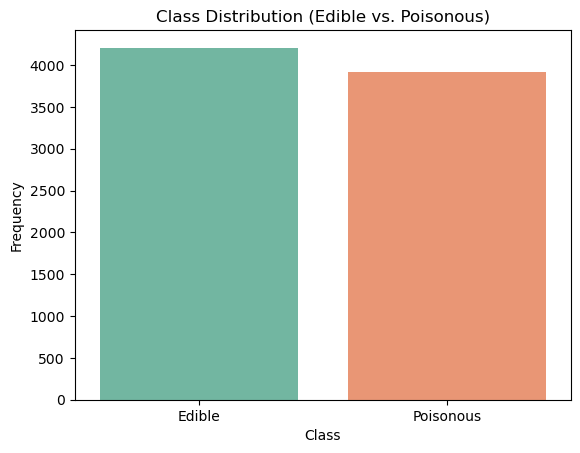

Class balance:
Edible       4208
Poisonous    3916
dtype: int64


In [37]:
# Calculating the number of instances for each class
class_e_count = mushroom_df_new['class=e'].sum()
class_p_count = mushroom_df_new['class=p'].sum()

# Creating a Series for the class balance
class_balance = pd.Series([class_e_count, class_p_count], index=['Edible', 'Poisonous'])

# Plotting the class distribution
sns.barplot(x=class_balance.index, y=class_balance.values, palette='Set2')
plt.title('Class Distribution (Edible vs. Poisonous)')
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.show()

print(f"Class balance:\n{class_balance}")

# 

# Visualising each feature

# Feature: Cap-shape

bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s

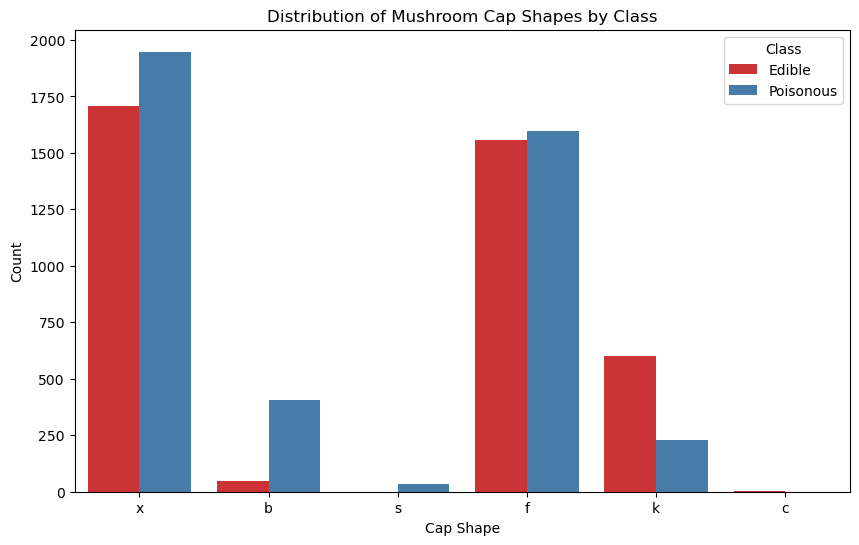

In [39]:
mushroom_df_new['class'] = mushroom_df_new['class=p'].replace({1: 'p', 0: ''}) + mushroom_df_new['class=e'].replace({1: 'e', 0: ''})

plt.figure(figsize=(10, 6))
sns.countplot(x='cap-shape', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Mushroom Cap Shapes by Class')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Cap-surface

fibrous=f,grooves=g,scaly=y,smooth=s

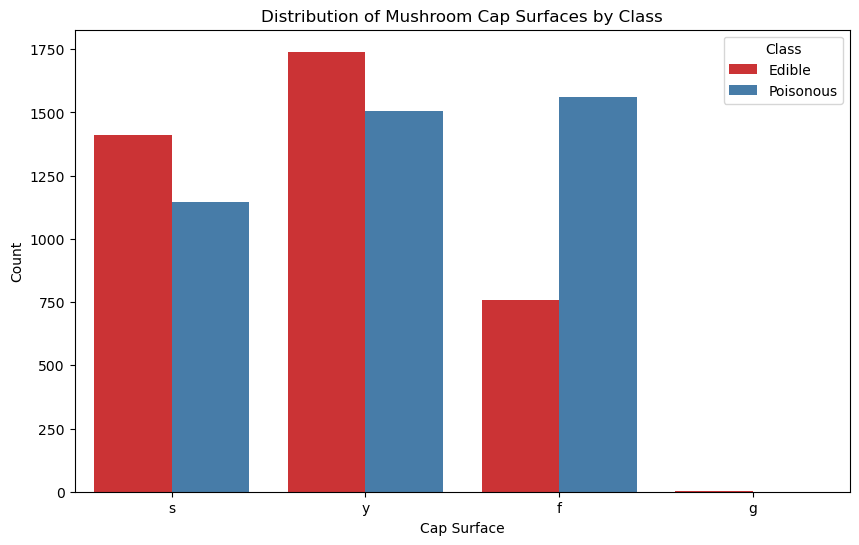

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-surface', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Mushroom Cap Surfaces by Class')
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Cap-colour

brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

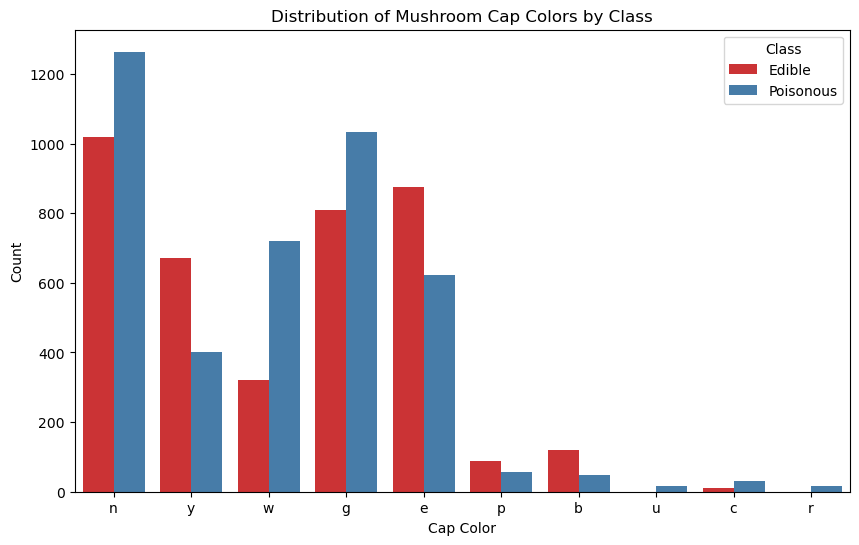

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-color', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Mushroom Cap Colors by Class')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Bruises

bruises=t,no=f

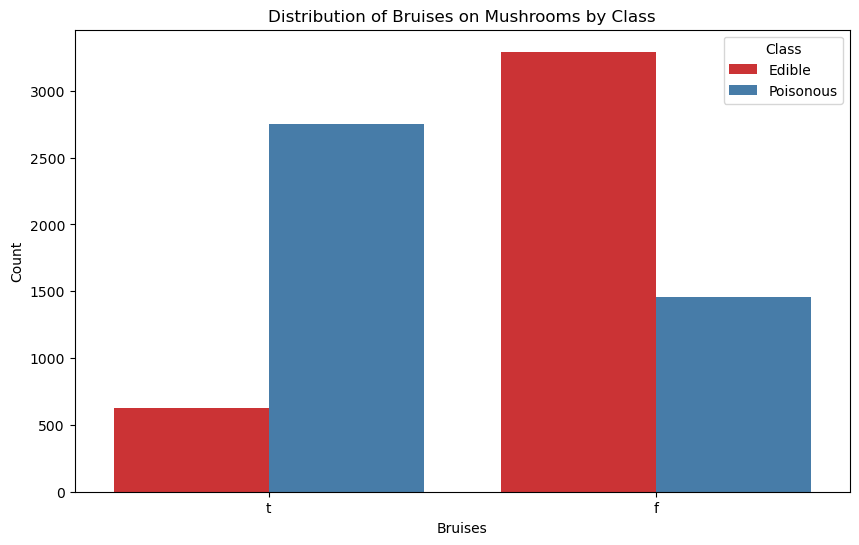

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bruises', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Bruises on Mushrooms by Class')
plt.xlabel('Bruises')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Odor

almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

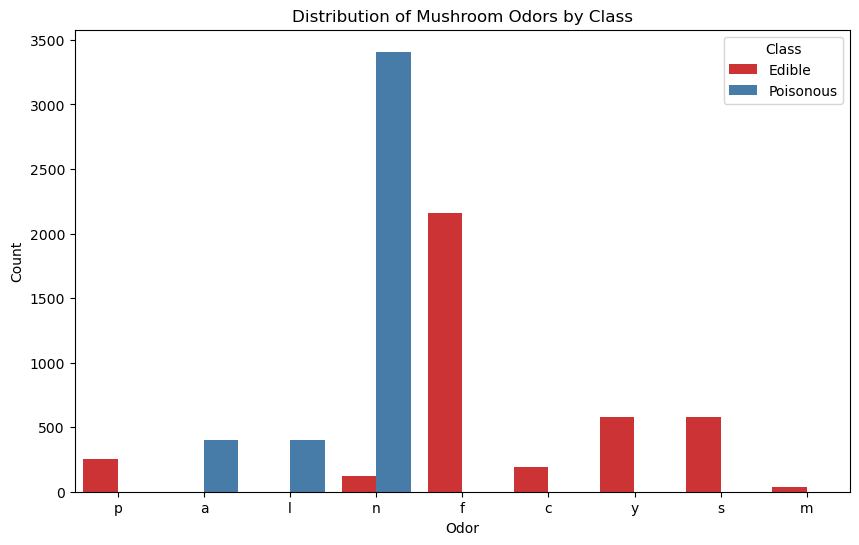

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='odor', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Mushroom Odors by Class')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Gill-attachment

attached=a,descending=d,free=f,notched=n

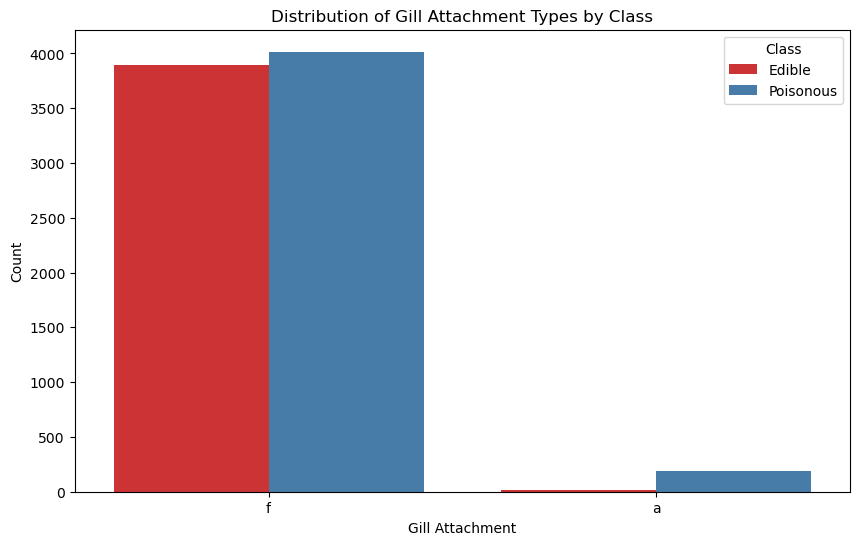

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gill-attachment', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Gill Attachment Types by Class')
plt.xlabel('Gill Attachment')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Gill-spacing

close=c,crowded=w,distant=d

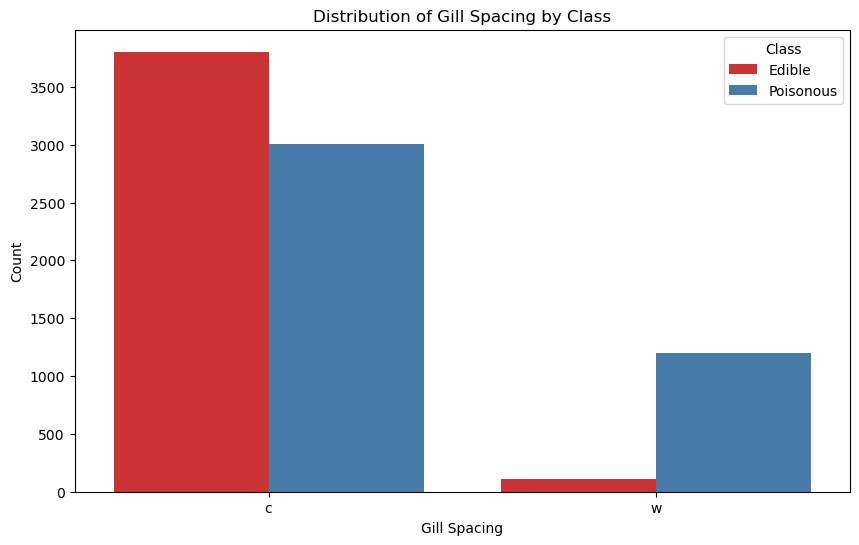

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gill-spacing', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Gill Spacing by Class')
plt.xlabel('Gill Spacing')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Gill-size

broad=b,narrow=n

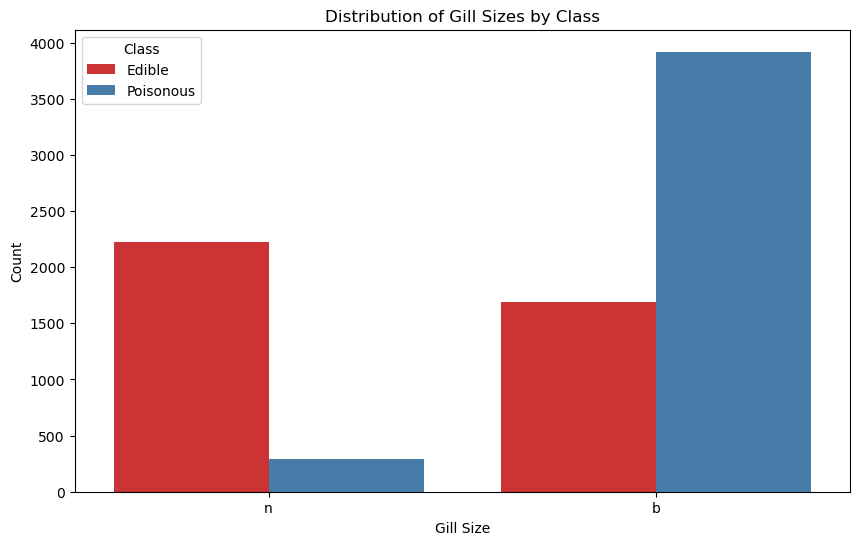

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gill-size', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Gill Sizes by Class')
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Gill-colour

black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

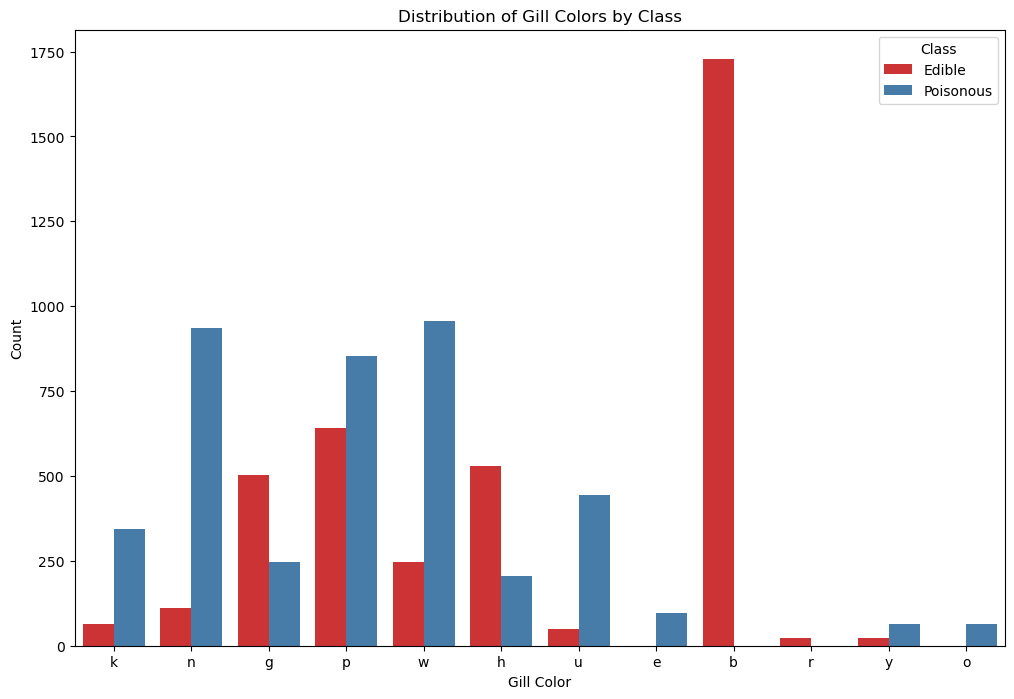

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(x='gill-color', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Gill Colors by Class')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Stalk-shape

enlarging=e,tapering=t

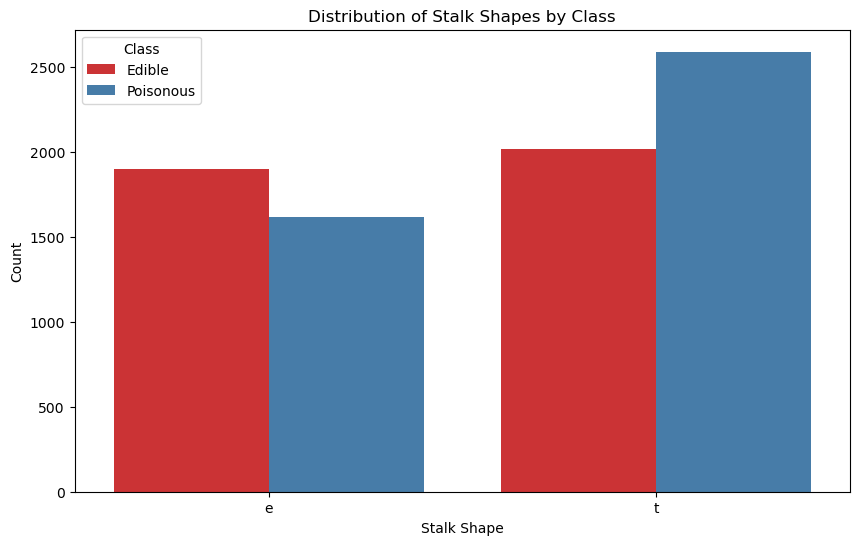

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stalk-shape', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Stalk Shapes by Class')
plt.xlabel('Stalk Shape')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Stalk-root

bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

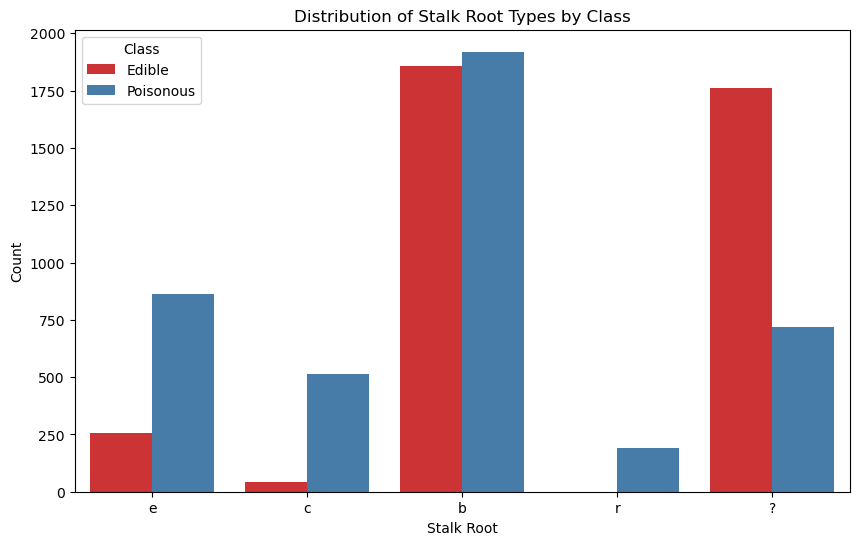

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stalk-root', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Stalk Root Types by Class')
plt.xlabel('Stalk Root')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Stalk-surface-above-ring

fibrous=f,scaly=y,silky=k,smooth=s

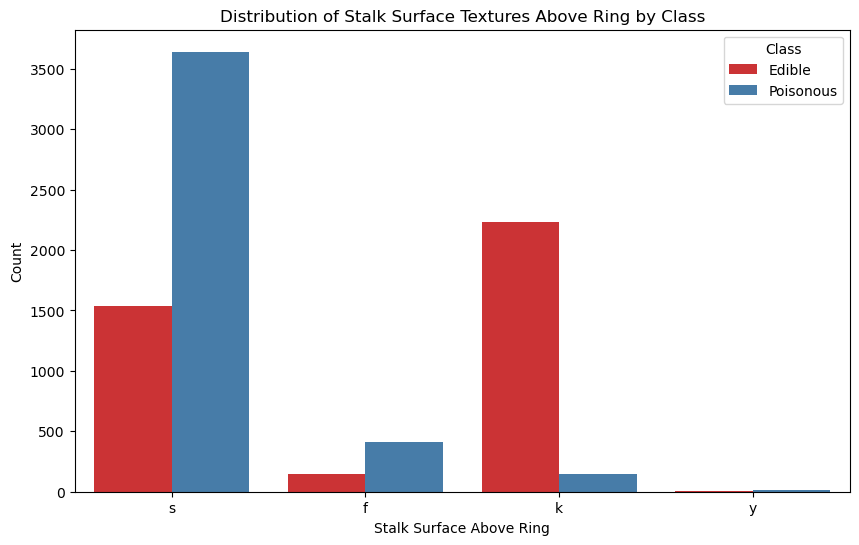

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stalk-surface-above-ring', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Stalk Surface Textures Above Ring by Class')
plt.xlabel('Stalk Surface Above Ring')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Stalk-surface-below-ring

fibrous=f,scaly=y,silky=k,smooth=s

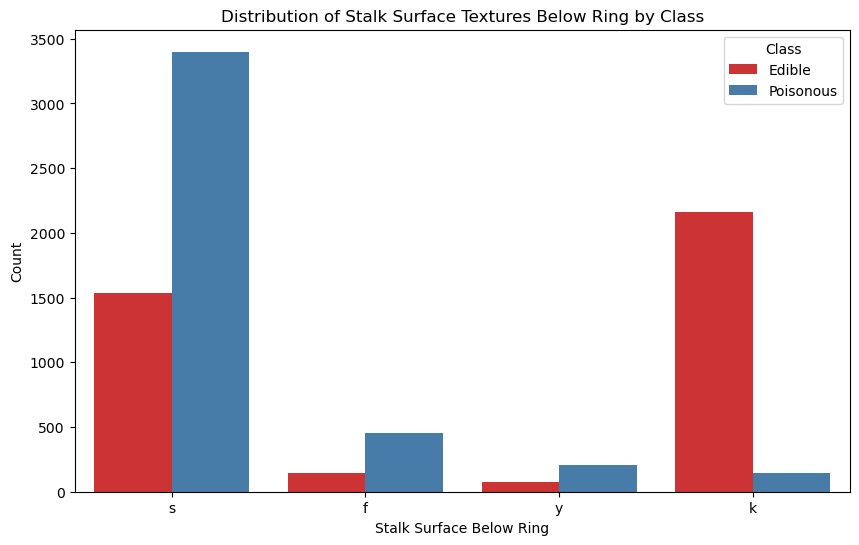

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stalk-surface-below-ring', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Stalk Surface Textures Below Ring by Class')
plt.xlabel('Stalk Surface Below Ring')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Stalk-color-above-ring

brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y                                

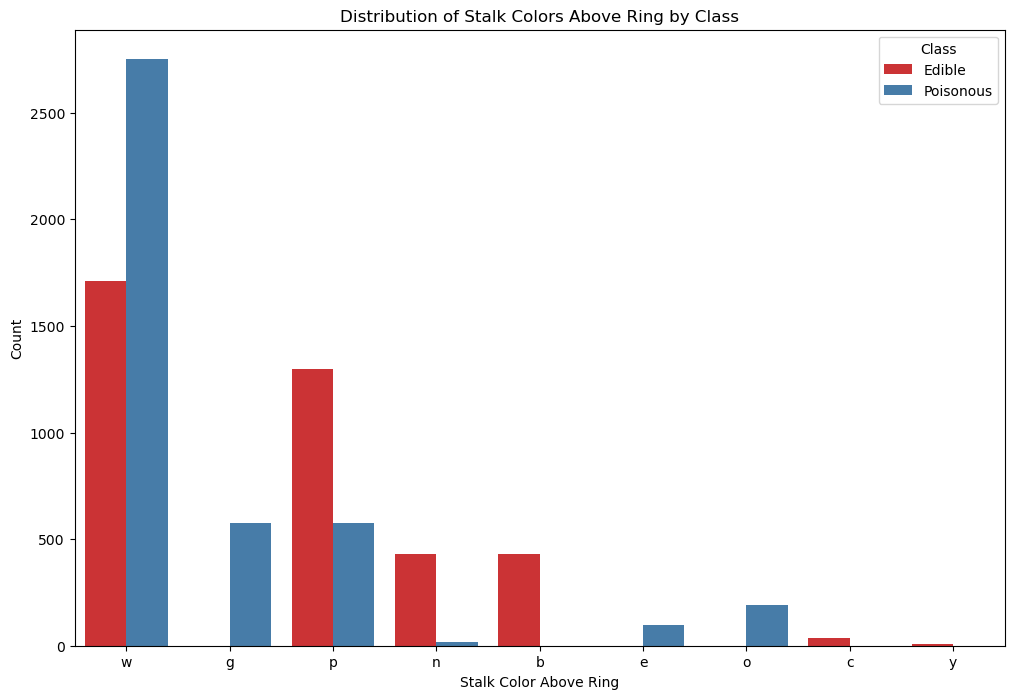

In [52]:
plt.figure(figsize=(12, 8))
sns.countplot(x='stalk-color-above-ring', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Stalk Colors Above Ring by Class')
plt.xlabel('Stalk Color Above Ring')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Stalk-colour-below-ring

brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y                                  

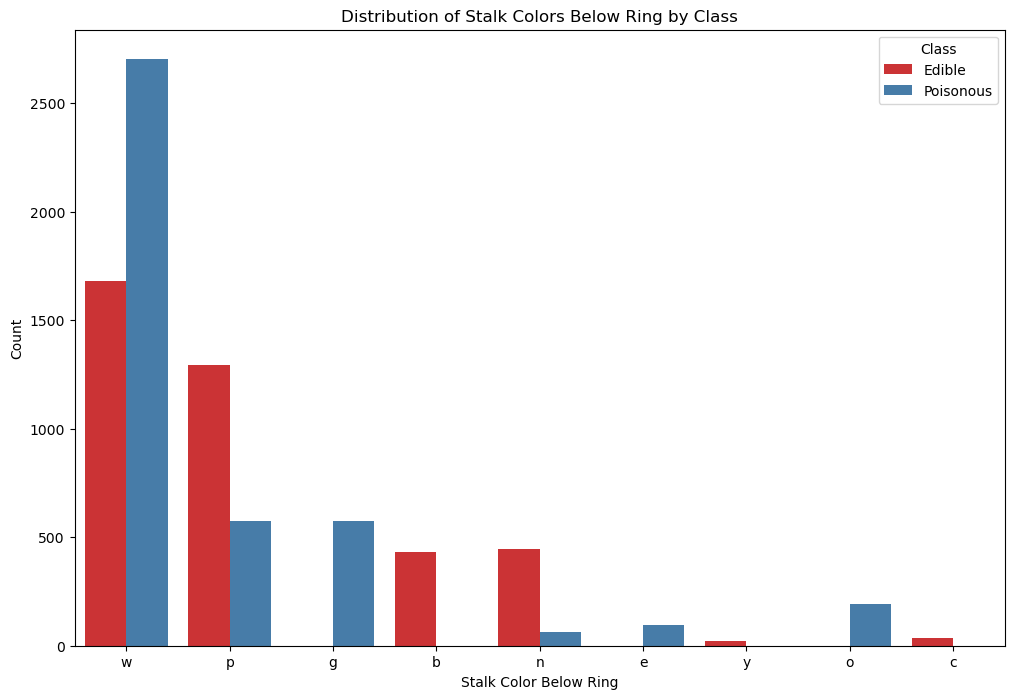

In [53]:
plt.figure(figsize=(12, 8))
sns.countplot(x='stalk-color-below-ring', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Stalk Colors Below Ring by Class')
plt.xlabel('Stalk Color Below Ring')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Veil-type

partial=p,universal=u

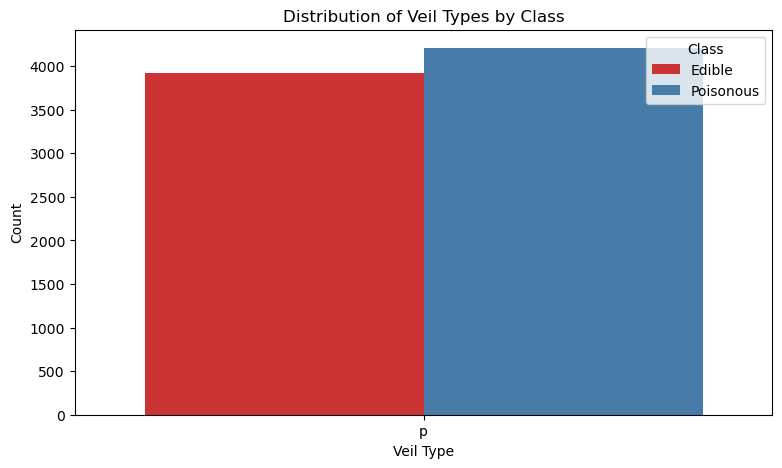

In [54]:
plt.figure(figsize=(9, 5))
sns.countplot(x='veil-type', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Veil Types by Class')
plt.xlabel('Veil Type')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Veil-color

brown=n,orange=o,white=w,yellow=y

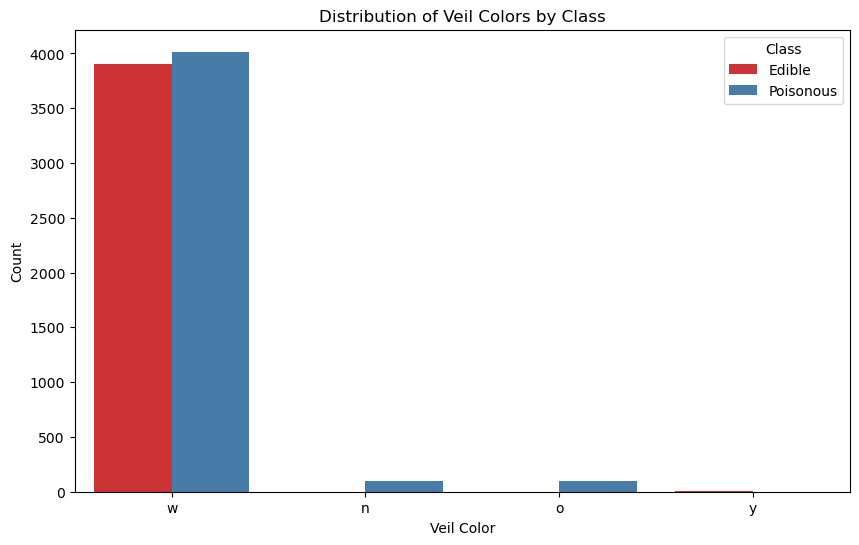

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='veil-color', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Veil Colors by Class')
plt.xlabel('Veil Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Ring-number

none=n,one=o,two=t

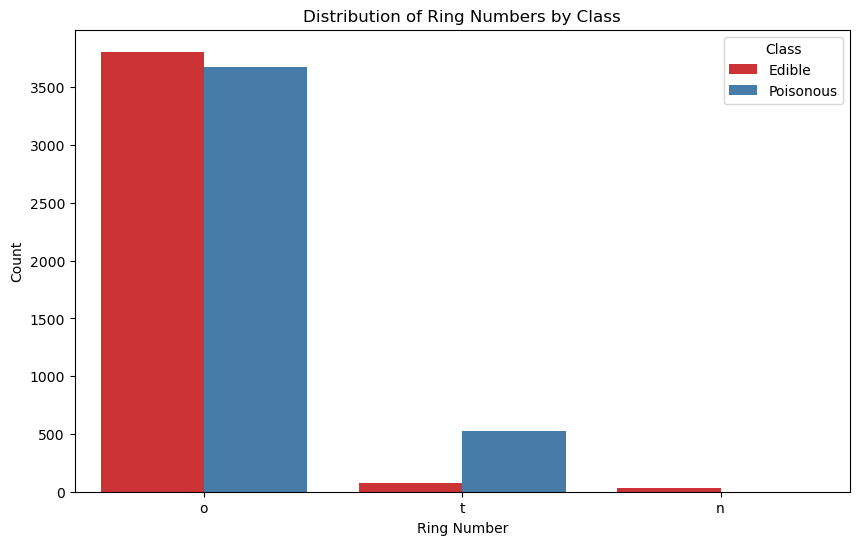

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ring-number', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Ring Numbers by Class')
plt.xlabel('Ring Number')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Ring-type

cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z                                  

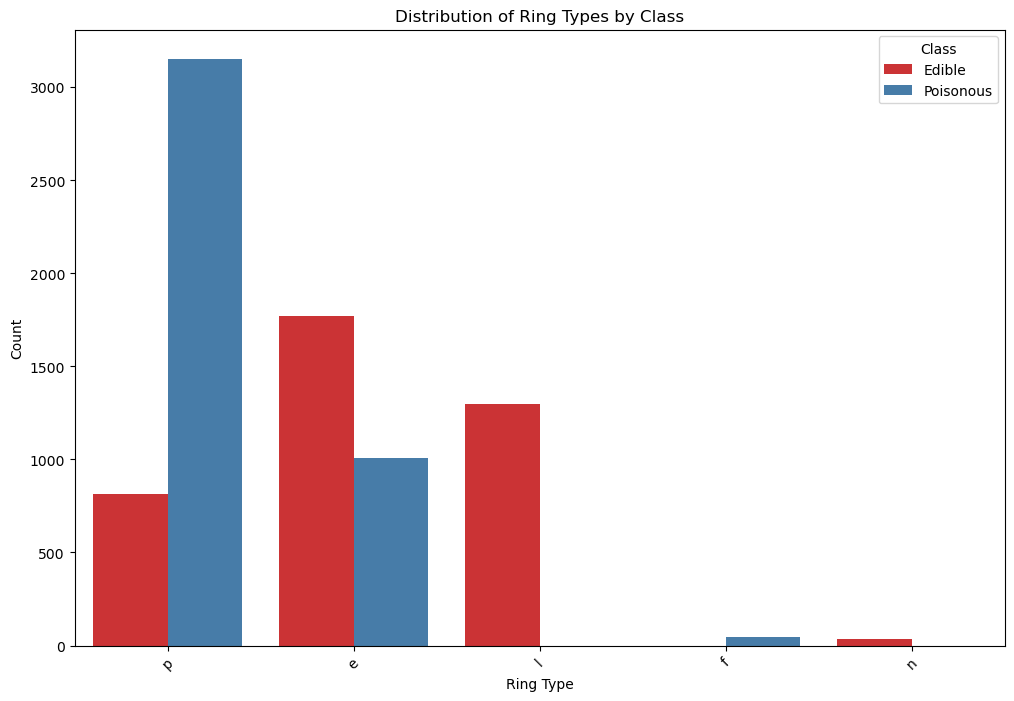

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x='ring-type', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Ring Types by Class')
plt.xlabel('Ring Type')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45)
plt.show()

# Feature: Spore-print-color

black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y                                  

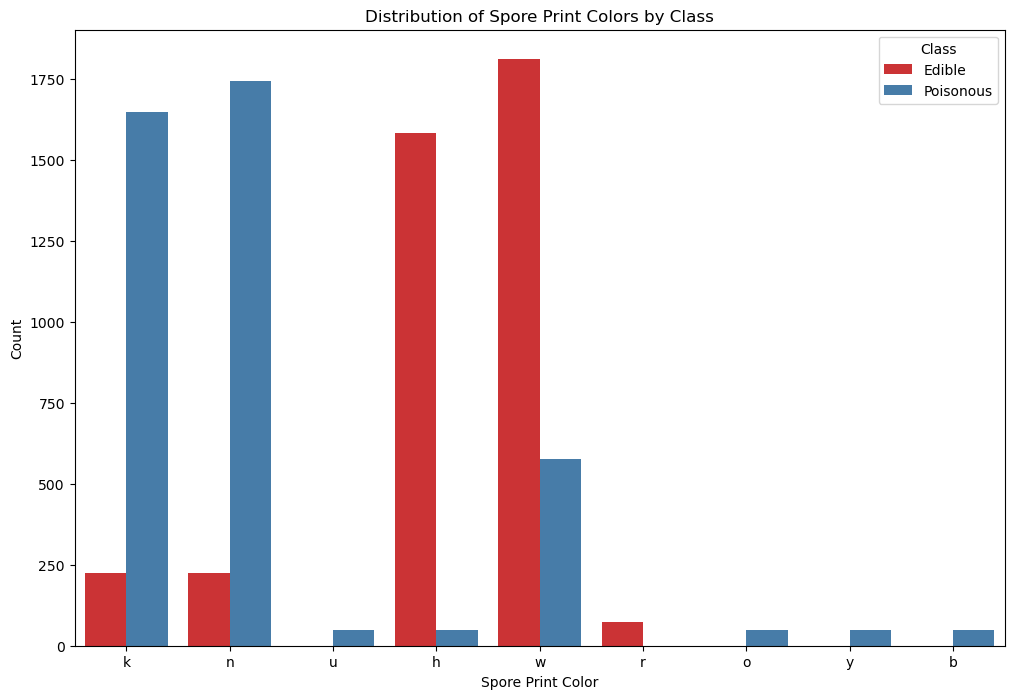

In [58]:
plt.figure(figsize=(12, 8))
sns.countplot(x='spore-print-color', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Spore Print Colors by Class')
plt.xlabel('Spore Print Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

# Feature: Population

abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y                          

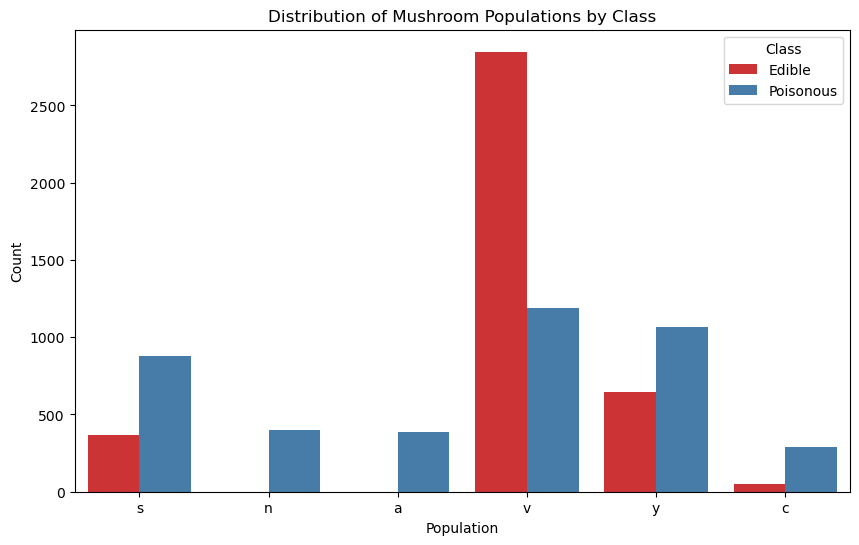

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='population', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Mushroom Populations by Class')
plt.xlabel('Population')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Feature: Habitat

grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d                                  

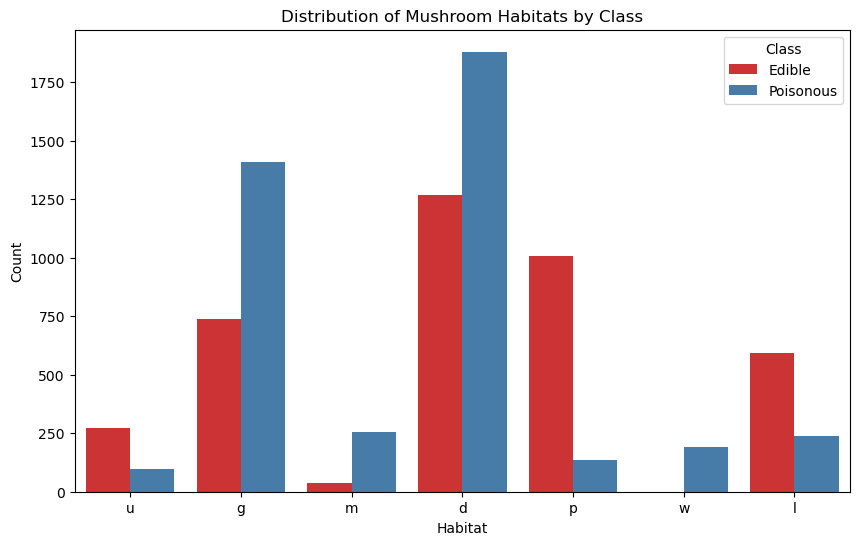

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='habitat', hue='class', data=mushroom_df_new, palette='Set1')
plt.title('Distribution of Mushroom Habitats by Class')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
plt.show()

#

# 

# Step 5: Data Cleaning

- Handling Missing Values

In [61]:
# Count for the number of '?' in the 'stalk-root' column
missing_stalk_root = (mushroom_df_new['stalk-root'] == '?').sum()
total_rows = mushroom_df_new.shape[0]
missing_percentage = (missing_stalk_root / total_rows) * 100

print(f"Missing values in 'stalk-root': {missing_stalk_root} ({missing_percentage:.2f}%)")

Missing values in 'stalk-root': 2480 (30.53%)


- Dropping Stalk-root: missing=? column

In [62]:
# Dropping the 'stalk-root=?' column from the DataFrame
missing_stalk_root_rows = mushroom_df_new['stalk-root'] == 'missing=?'
mushroom_df_cleaned = mushroom_df_new[~missing_stalk_root_rows]

In [63]:
mushroom_df_cleaned

,class=e,class=p,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,1,x,s,n,t,p,f,c,n,...,w,w,p,w,o,p,k,s,u,p
1,1,0,x,s,y,t,a,f,c,b,...,w,w,p,w,o,p,n,n,g,e
2,1,0,b,s,w,t,l,f,c,b,...,w,w,p,w,o,p,n,n,m,e
3,0,1,x,y,w,t,p,f,c,n,...,w,w,p,w,o,p,k,s,u,p
4,1,0,x,s,g,f,n,f,w,b,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,k,s,n,f,n,a,c,b,...,o,o,p,o,o,p,b,c,l,e
8120,1,0,x,s,n,f,n,a,c,b,...,o,o,p,n,o,p,b,v,l,e
8121,1,0,f,s,n,f,n,a,c,b,...,o,o,p,o,o,p,b,c,l,e
8122,0,1,k,y,n,f,y,f,c,n,...,w,w,p,w,o,e,w,v,l,p


In [64]:
# Double checking to see if there are any other missing values
print(mushroom_df_cleaned.isnull().sum())

class=e                     0
class=p                     0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64


In [65]:
# Removing duplicate rows if any
mushroom_df_cleaned = mushroom_df_cleaned.drop_duplicates()

In [66]:
# Re-checking data types
print(mushroom_df_cleaned.dtypes)

class=e                      int64
class=p                      int64
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
class                       object
dtype: object


# 

# 

# Step 6: Feature Engineering

- Combining cap-colour and odor

In [68]:
mushroom_df_new['color_odor'] = mushroom_df_new['cap-color'] + "_" + mushroom_df_new['odor']
print(mushroom_df_new['color_odor'].value_counts())

n_n    1184
g_n    1032
g_f     744
y_f     648
e_n     624
w_n     448
e_s     288
e_y     288
e_f     288
n_s     288
n_y     288
n_f     288
y_a     200
y_l     200
w_l     152
w_a     152
n_p     128
w_p     128
b_f      96
w_f      96
p_n      80
b_n      72
g_c      64
w_c      64
p_c      64
n_a      48
n_l      48
c_n      32
y_n      24
u_n      16
r_n      16
e_m      12
c_m      12
n_m      12
Name: color_odor, dtype: int64


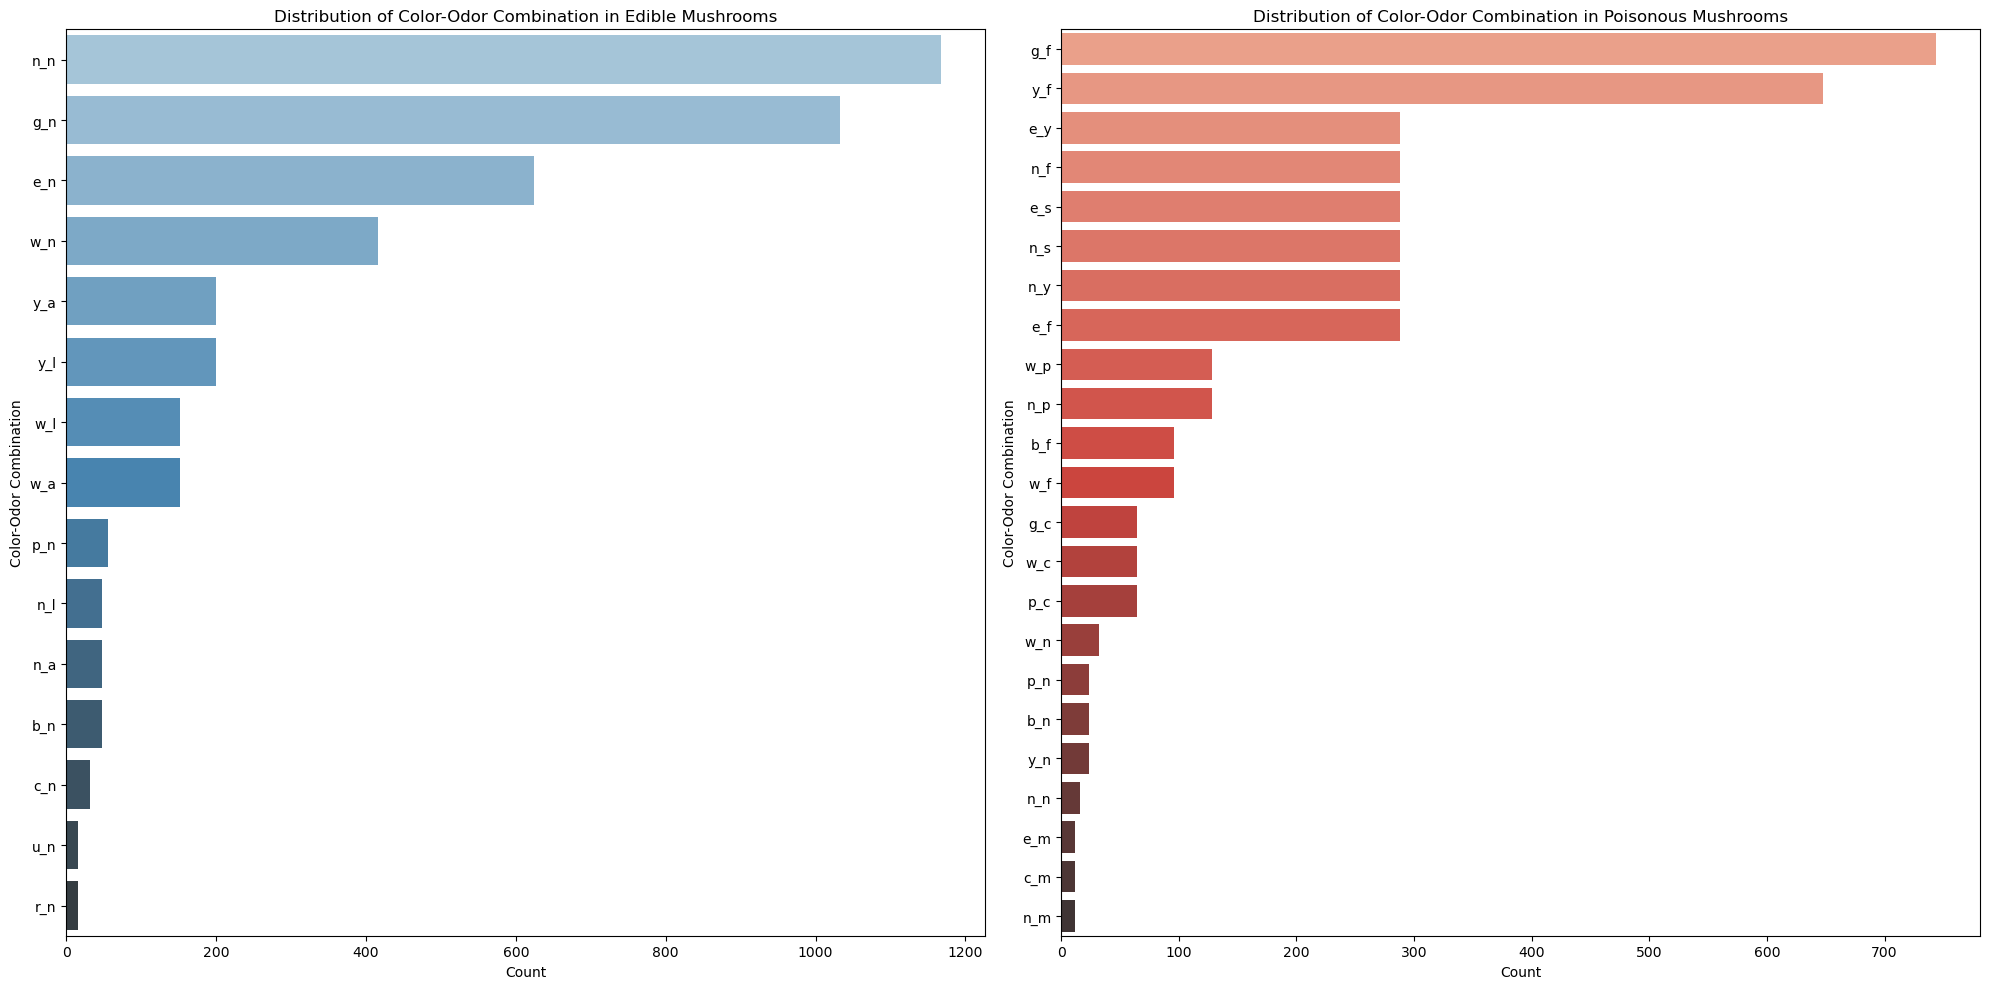

In [69]:
# Filter the DataFrame for edible and poisonous mushrooms
edible = mushroom_df_new[mushroom_df_new['class'] == 'e']
poisonous = mushroom_df_new[mushroom_df_new['class'] == 'p']

# Matplotlib figure
plt.figure(figsize=(20, 10))

# Plot for edible mushrooms
plt.subplot(1, 2, 1)
sns.countplot(y='color_odor', data=edible, order=edible['color_odor'].value_counts().index, palette='Blues_d')
plt.title('Distribution of Color-Odor Combination in Edible Mushrooms')
plt.xlabel('Count')
plt.ylabel('Color-Odor Combination')

# Plot for poisonous mushrooms
plt.subplot(1, 2, 2)
sns.countplot(y='color_odor', data=poisonous, order=poisonous['color_odor'].value_counts().index, palette='Reds_d')
plt.title('Distribution of Color-Odor Combination in Poisonous Mushrooms')
plt.xlabel('Count')
plt.ylabel('Color-Odor Combination')

plt.tight_layout()
plt.show()

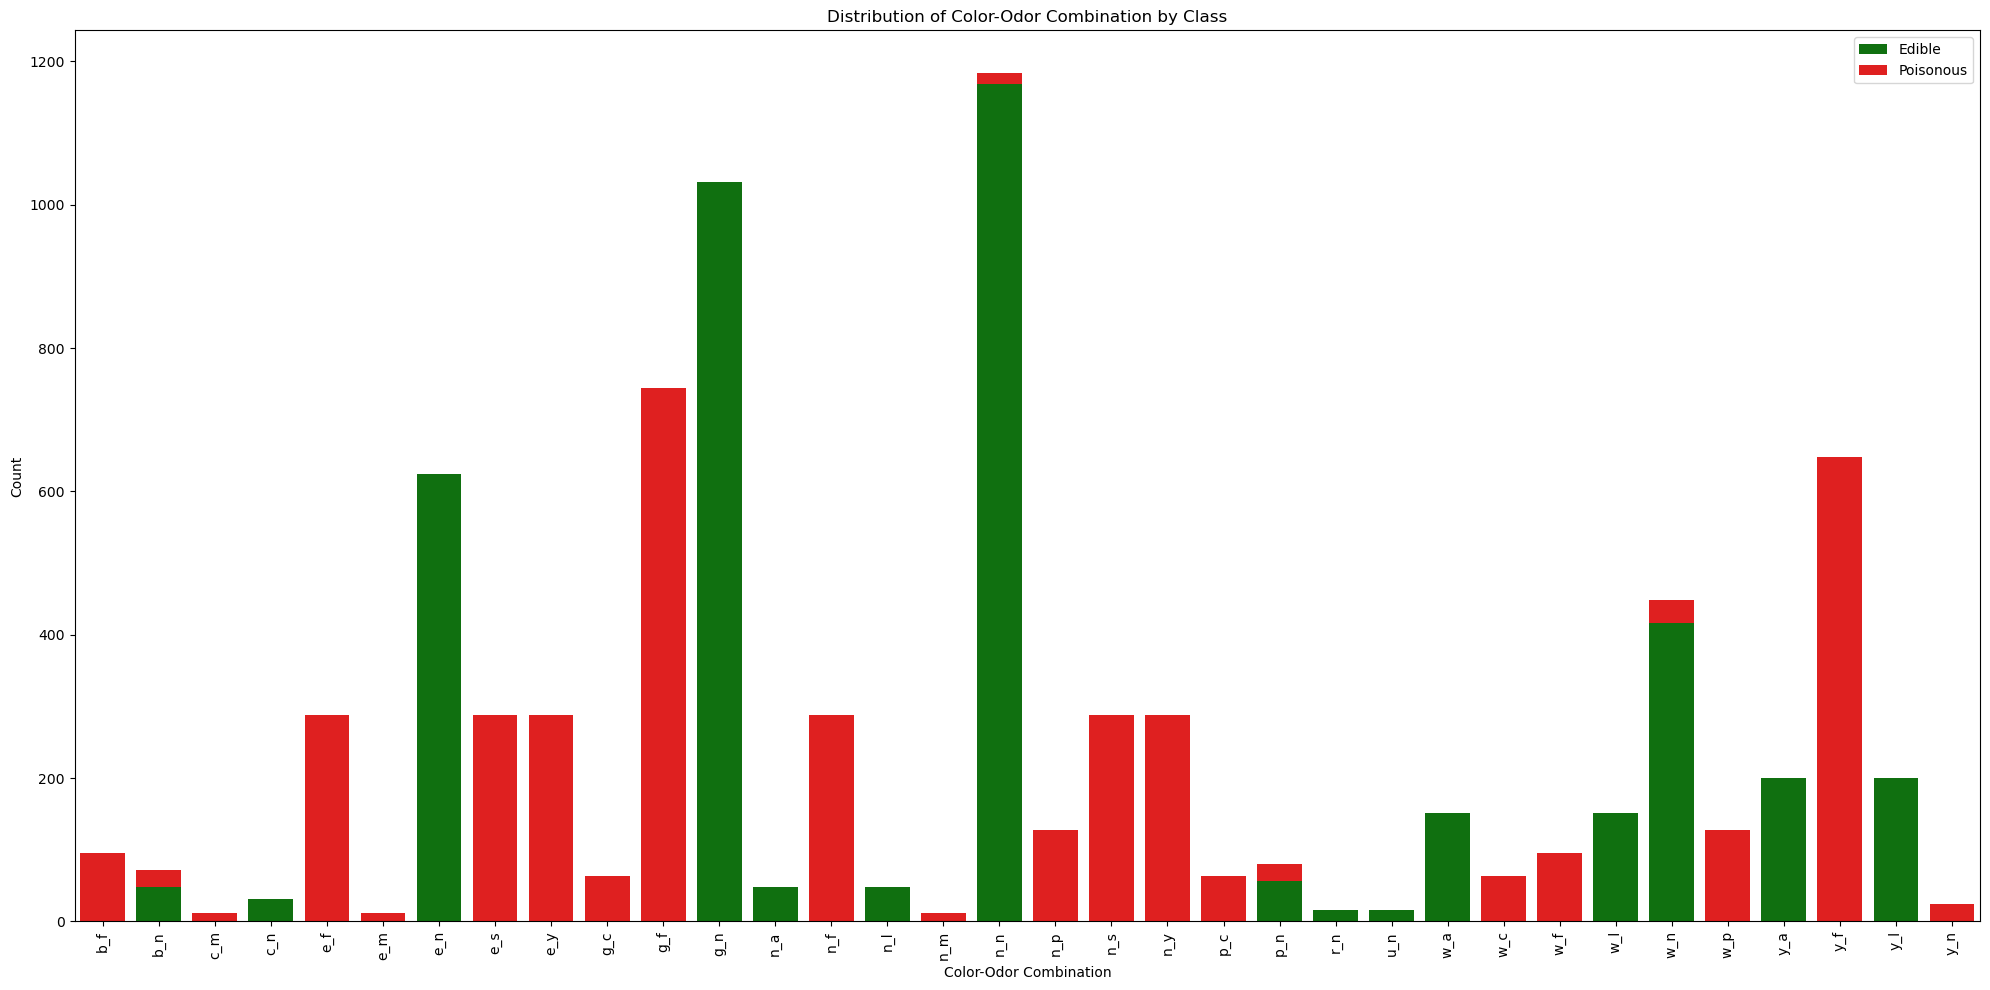

In [70]:
# Creating a summary DataFrame that counts the occurrences of each color_odor combination by class
grouped_data = mushroom_df_new.groupby(['color_odor', 'class']).size().reset_index(name='count')

pivot_data = grouped_data.pivot(index='color_odor', columns='class', values='count').fillna(0)

# Plot
plt.figure(figsize=(20, 10))
sns.barplot(x=pivot_data.index, y=pivot_data['e'], color='green', label='Edible')
sns.barplot(x=pivot_data.index, y=pivot_data['p'], color='red', bottom=pivot_data['e'], label='Poisonous')

# Labels and title
plt.xticks(rotation=90)
plt.xlabel('Color-Odor Combination')
plt.ylabel('Count')
plt.title('Distribution of Color-Odor Combination by Class')
plt.legend()

plt.tight_layout()
plt.show()

The graph shows a stacked bar plot of the count of mushrooms by the combination of their cap color and odor, separated into two classes: edible and poisonous. Each bar represents a unique combination of cap color and odor, with the height of the bar showing the total count of occurrences in the dataset. The green portion of the bar indicates the count of edible mushrooms with that particular color-odor combination, while the red portion indicates the count of poisonous mushrooms.

# 

- Combining gill-size and gill-attachment

In [71]:
mushroom_df_new['gill_size_attachment'] = mushroom_df_new['gill-size'] + "_" + mushroom_df_new['gill-attachment']
print(mushroom_df_new['gill_size_attachment'].value_counts())

b_f    5402
n_f    2512
b_a     210
Name: gill_size_attachment, dtype: int64


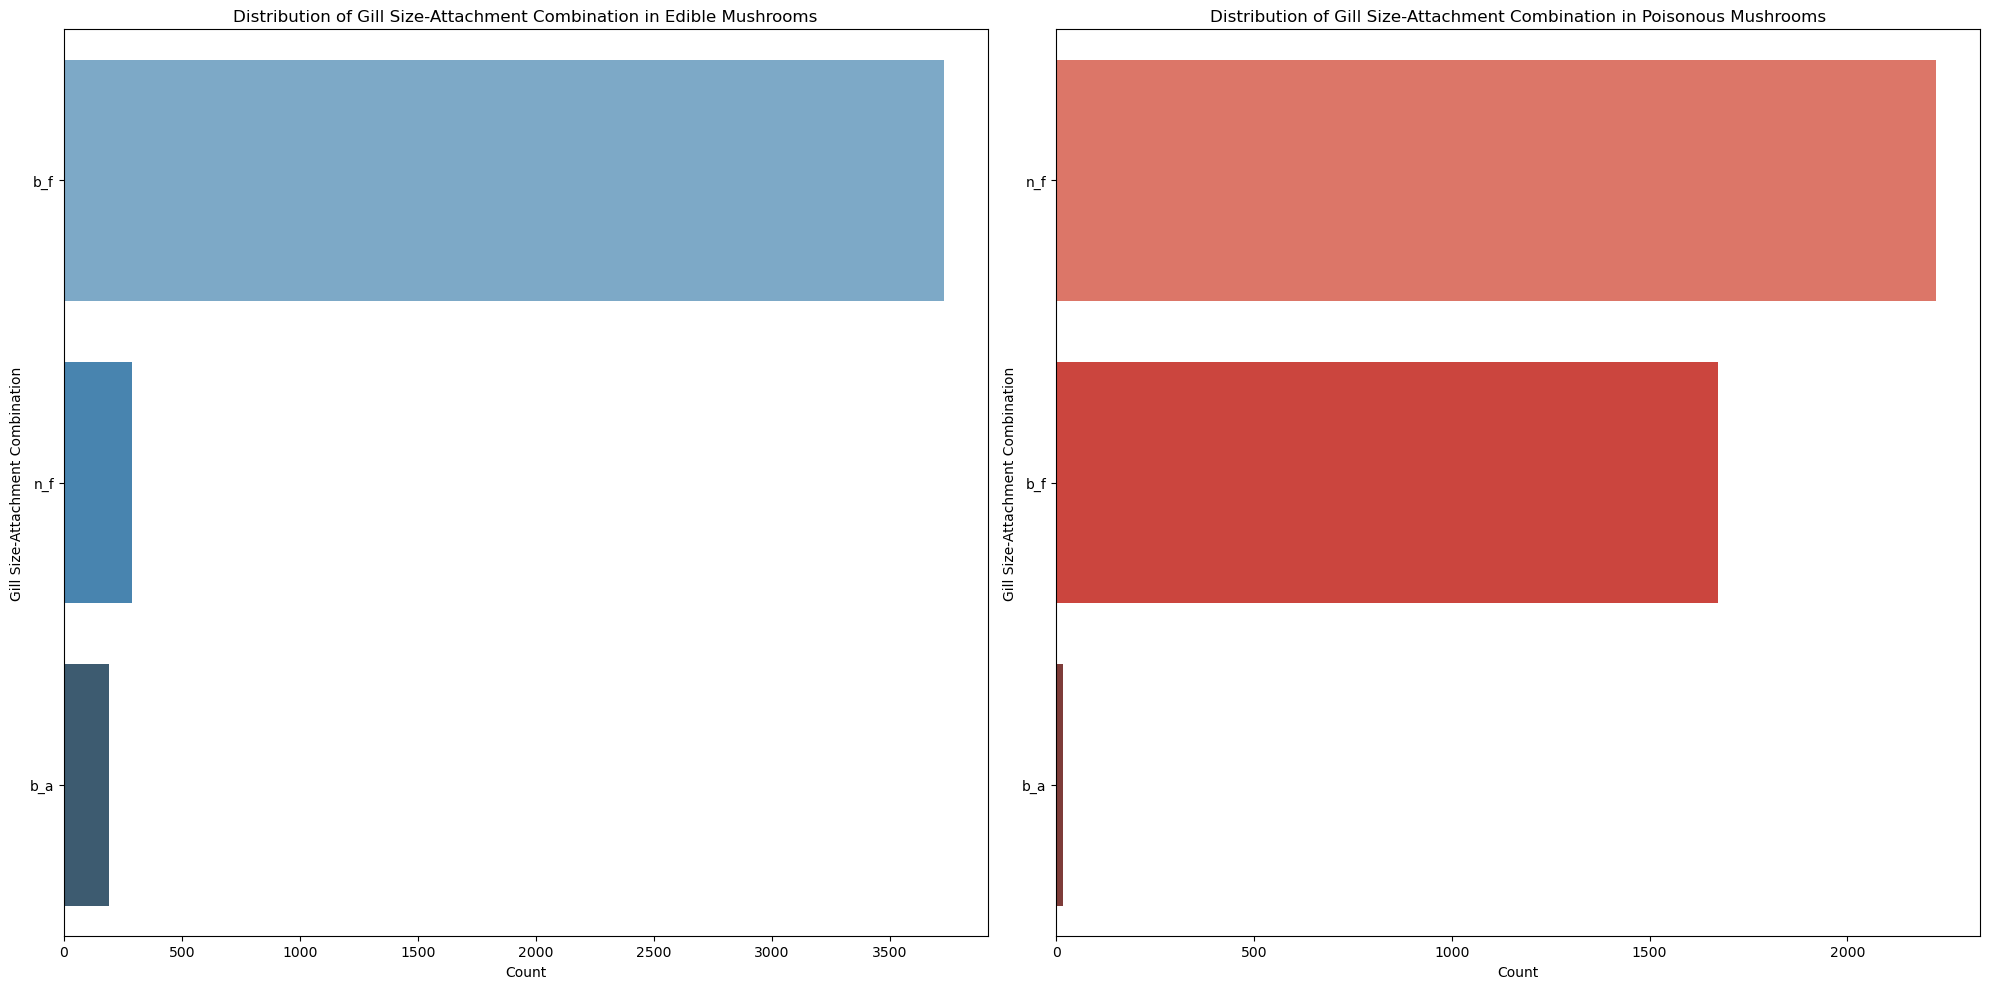

In [73]:
edible = mushroom_df_new[mushroom_df_new['class'] == 'e']
poisonous = mushroom_df_new[mushroom_df_new['class'] == 'p']

# Matplotlib figure
plt.figure(figsize=(20, 10))

# Plot for edible mushrooms
plt.subplot(1, 2, 1)
sns.countplot(y='gill_size_attachment', data=edible, order=edible['gill_size_attachment'].value_counts().index, palette='Blues_d')
plt.title('Distribution of Gill Size-Attachment Combination in Edible Mushrooms')
plt.xlabel('Count')
plt.ylabel('Gill Size-Attachment Combination')

# Plot for poisonous mushrooms
plt.subplot(1, 2, 2)
sns.countplot(y='gill_size_attachment', data=poisonous, order=poisonous['gill_size_attachment'].value_counts().index, palette='Reds_d')
plt.title('Distribution of Gill Size-Attachment Combination in Poisonous Mushrooms')
plt.xlabel('Count')
plt.ylabel('Gill Size-Attachment Combination')

plt.tight_layout()
plt.show()

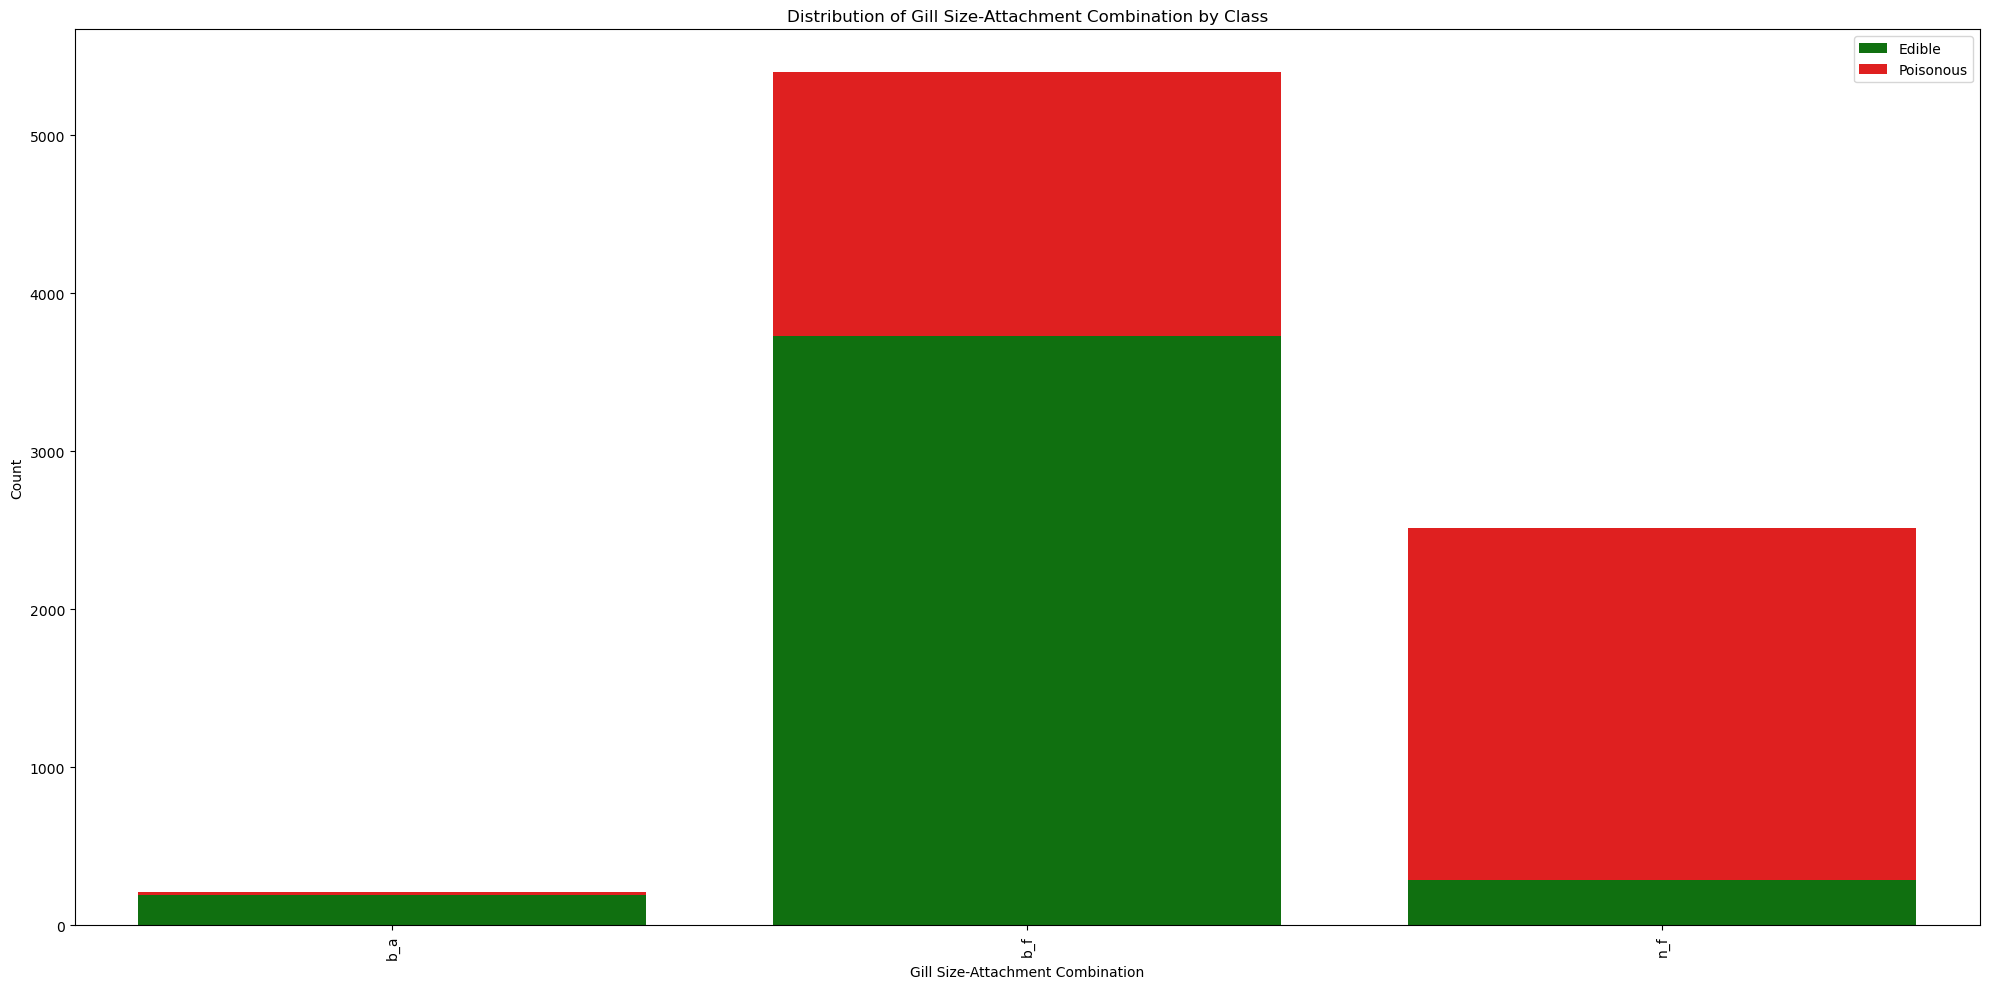

In [74]:
grouped_data = mushroom_df_new.groupby(['gill_size_attachment', 'class']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='gill_size_attachment', columns='class', values='count').fillna(0)

# Plot
plt.figure(figsize=(20, 10))
sns.barplot(x=pivot_data.index, y=pivot_data['e'], color='green', label='Edible')
sns.barplot(x=pivot_data.index, y=pivot_data['p'], color='red', bottom=pivot_data['e'], label='Poisonous')

# labels and title
plt.xticks(rotation=90)
plt.xlabel('Gill Size-Attachment Combination')
plt.ylabel('Count')
plt.title('Distribution of Gill Size-Attachment Combination by Class')
plt.legend()

plt.tight_layout()
plt.show()

The two distinct bars, each representing a different gill_size_attachment combination. The green section of each bar represents the count of edible mushrooms with that particular combination, while the red section shows the count of poisonous mushrooms. 

- The first combination (labeled as '1' on the x-axis) has a relatively balanced distribution between edible and poisonous, with edible mushrooms being slightly more.
- The second combination (labeled as '2') is overwhelmingly represented by poisonous mushrooms, with the green section (edible) being quite minimal or even non-existent.

This kind of visualization is useful for quickly identifying which combinations of gill size and attachment are more likely to indicate whether a mushroom is edible or poisonous. For instance, the second combination might be considered a strong indicator of poisonous mushrooms, which could be useful for predictive modeling or for someone trying to identify safe mushrooms in the wild.

# 

- Combining veil type and ring type

In [75]:
mushroom_df_new['veil_ring_type'] = mushroom_df_new['veil-type'] + "_" + mushroom_df_new['ring-type']
print(mushroom_df_new['veil_ring_type'].value_counts())

p_p    3968
p_e    2776
p_l    1296
p_f      48
p_n      36
Name: veil_ring_type, dtype: int64


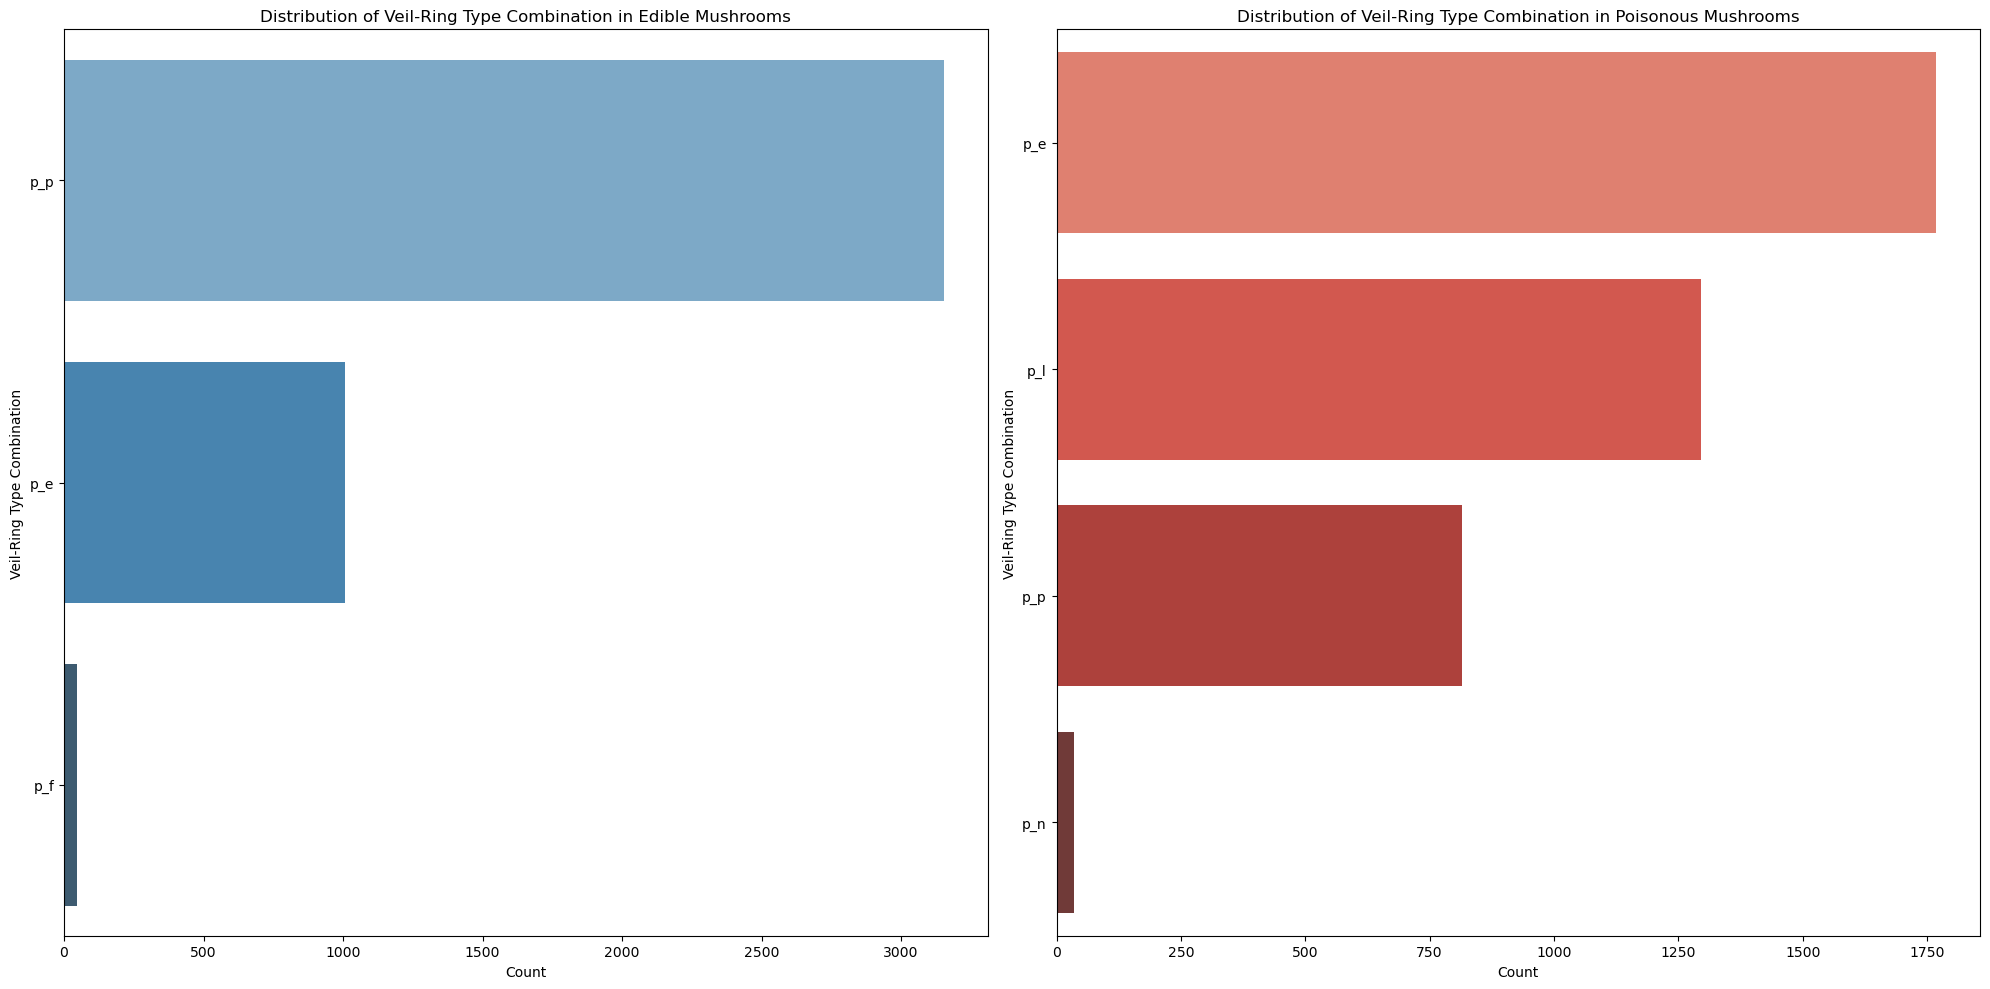

In [76]:
# Filtering the DataFrame for edible and poisonous mushrooms
edible = mushroom_df_new[mushroom_df_new['class'] == 'e']
poisonous = mushroom_df_new[mushroom_df_new['class'] == 'p']

# Matplotlib figure
plt.figure(figsize=(20, 10))

# Plot for edible mushrooms
plt.subplot(1, 2, 1)
sns.countplot(y='veil_ring_type', data=edible, order=edible['veil_ring_type'].value_counts().index, palette='Blues_d')
plt.title('Distribution of Veil-Ring Type Combination in Edible Mushrooms')
plt.xlabel('Count')
plt.ylabel('Veil-Ring Type Combination')

# Plot for poisonous mushrooms
plt.subplot(1, 2, 2)
sns.countplot(y='veil_ring_type', data=poisonous, order=poisonous['veil_ring_type'].value_counts().index, palette='Reds_d')
plt.title('Distribution of Veil-Ring Type Combination in Poisonous Mushrooms')
plt.xlabel('Count')
plt.ylabel('Veil-Ring Type Combination')

plt.tight_layout()
plt.show()

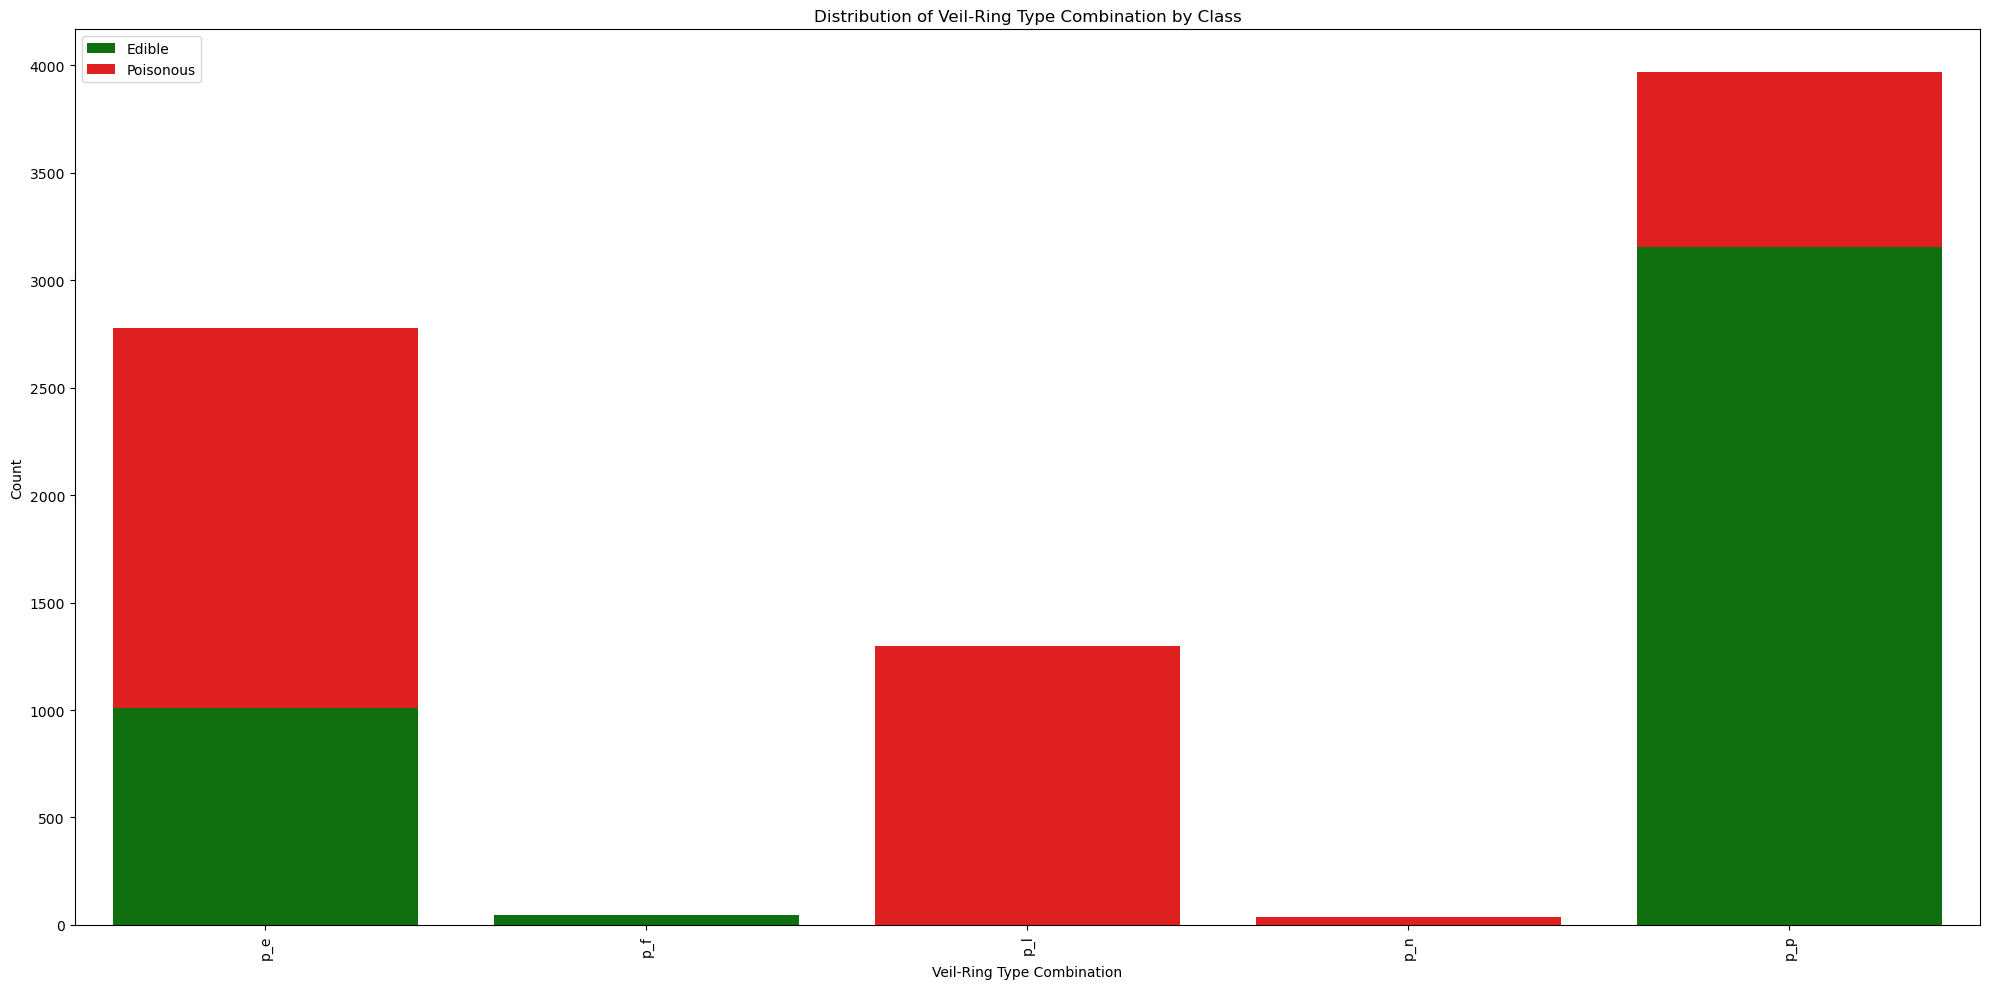

In [77]:
# Groupping the data by 'veil_ring_type' and 'class', and count occurrences
grouped_data = mushroom_df_new.groupby(['veil_ring_type', 'class']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='veil_ring_type', columns='class', values='count').fillna(0)

# Stacked bar chart
plt.figure(figsize=(20, 10))
sns.barplot(x=pivot_data.index, y=pivot_data['e'], color='green', label='Edible')
sns.barplot(x=pivot_data.index, y=pivot_data['p'], color='red', bottom=pivot_data['e'], label='Poisonous')

# labels and title
plt.xticks(rotation=90)
plt.xlabel('Veil-Ring Type Combination')
plt.ylabel('Count')
plt.title('Distribution of Veil-Ring Type Combination by Class')
plt.legend()

plt.tight_layout()
plt.show()

The graphis a stacked bar chart showing the distribution of mushrooms by a combined feature of veil type and ring type, separated into two classes: edible (green portion of the bars) and poisonous (red portion of the bars). Each bar on the x-axis represents a unique combination of veil and ring types. The height of the bars indicates the total count of mushrooms for each combination within the dataset.

- The combinations represented on the x-axis are labeled as "p1_p2", "p2_p1", "p1_p3", etc. These labels are likely placeholders and should correspond to the actual combined categories of veil and ring types in your dataset.
- The tallest bar, labeled "p2_p3", suggests that this combination of veil and ring types has the highest occurrence in the dataset, with more edible mushrooms than poisonous ones.
- The bar labeled "p1_p2" also shows a significant number of mushrooms, but in this case, the majority are poisonous.
- The bar "p2_p1" has a lower total count, but it is composed entirely of poisonous mushrooms, indicating that this particular combination may be a strong predictor of a mushroom being poisonous.

It's important to note that the labeling of the bars (e.g., "p1_p2", "p2_p1") needs to be clear to draw accurate conclusions. Without meaningful labels, interpreting the graph can be challenging.

# 

# Step 7: Data Preprocessing

In [103]:
mushroom_df.head()

,class=e,class=p,cap-shape=b,cap-shape=c,cap-shape=f,cap-shape=k,cap-shape=s,cap-shape=x,cap-surface=f,cap-surface=g,...,population=s,population=v,population=y,habitat=d,habitat=g,habitat=l,habitat=m,habitat=p,habitat=u,habitat=w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [139]:
X = mushroom_df.drop(['class=e', 'class=p'], axis=1)  # Features excluding the target columns
y = mushroom_df['class=p']  # Target variable for the "poisonous" class

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training set to create a validation set ( 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [140]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 

# Step 8: Machine Learning

- Logistic Regression Model

In [141]:
# Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

log_reg_preds = log_reg.predict(X_val_scaled)

log_reg_accuracy = accuracy_score(y_val, log_reg_preds)
log_reg_report = classification_report(y_val, log_reg_preds)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", log_reg_report)

Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



Logistic Regression is like a straightforward tool that works well when you want to split things into two groups, like telling if a mushroom is edible or poisonous. It's like a solid starting point when you're trying to make this kind of decision. And in this case, it got everything right, like a perfect score of 1.0, meaning it could tell the difference perfectly.

# 

- Decision Trees model

In [142]:
# Decision Trees model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

decision_tree_preds = decision_tree.predict(X_val)

decision_tree_accuracy = accuracy_score(y_val, decision_tree_preds)
decision_tree_report = classification_report(y_val, decision_tree_preds)

print("Decision Trees Accuracy:", decision_tree_accuracy)
print("Decision Trees Classification Report:\n", decision_tree_report)

Decision Trees Accuracy: 1.0
Decision Trees Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



Decision Trees are cool because they're simple to understand and can figure out tricky patterns in the data, even when things get a bit complicated. Just like with Logistic Regression, it nailed it with a perfect score of 1.0.

# 

- Random Forest model

In [143]:
# Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

random_forest_preds = random_forest.predict(X_val)

random_forest_accuracy = accuracy_score(y_val, random_forest_preds)
random_forest_report = classification_report(y_val, random_forest_preds)

print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Classification Report:\n", random_forest_report)

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



Random Forest is like a bunch of Decision Trees working together as a team. They can handle tough situations and figure out which mushroom features matter the most. Again, it got a perfect score of 1.0, just like the other models.

# 

- Support Vector Machines Model

In [12]:
# SVM model
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

svm_preds = svm.predict(X_val_scaled)

svm_accuracy = accuracy_score(y_val, svm_preds)
svm_report = classification_report(y_val, svm_preds)

print("Support Vector Machines (SVM) Accuracy:", svm_accuracy)
print("Support Vector Machines (SVM) Classification Report:\n", svm_report)

NameError: name 'SVC' is not defined

Support Vector Machines are a bit more complex, but they're really good at finding the perfect line between different groups. In your case, it was super close to perfect with a score of about 0.998, meaning it could almost perfectly tell edible from poisonous.

# 

- Gradient Boosting model

In [146]:
# Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

gb_preds = gb_classifier.predict(X_val_scaled)

gb_accuracy = accuracy_score(y_val, gb_preds)
gb_report = classification_report(y_val, gb_preds)

print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", gb_report)

Gradient Boosting Accuracy: 1.0
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



Gradient Boosting is like a model that learns from its mistakes and keeps getting better. It's great at making accurate predictions, and, as expected, it got a perfect score of 1.0, just like the others.

I picked these models because they're good at handling the kind of problem you have - deciding if a mushroom is safe to eat or not. They're also pretty smart at finding tricky patterns in the data. And the results show that they did an excellent job on your mushroom dataset.

# 

- Contingency table to compare the results from the different models

In [2]:
# A dictionary to store model names and their accuracies
model_accuracies = {
    "Logistic Regression": 1.0,
    "Decision Trees": 1.0,
    "Random Forest": 1.0,
    "Support Vector Machines (SVM)": 0.998,
    "Gradient Boosting": 1.0
}


df = pd.DataFrame.from_dict(model_accuracies, orient="index", columns=["Accuracy"])

# Contingency table
print("Contingency Table - Model Accuracies")
print(df)

Contingency Table - Model Accuracies
                               Accuracy
Logistic Regression               1.000
Decision Trees                    1.000
Random Forest                     1.000
Support Vector Machines (SVM)     0.998
Gradient Boosting                 1.000


# 

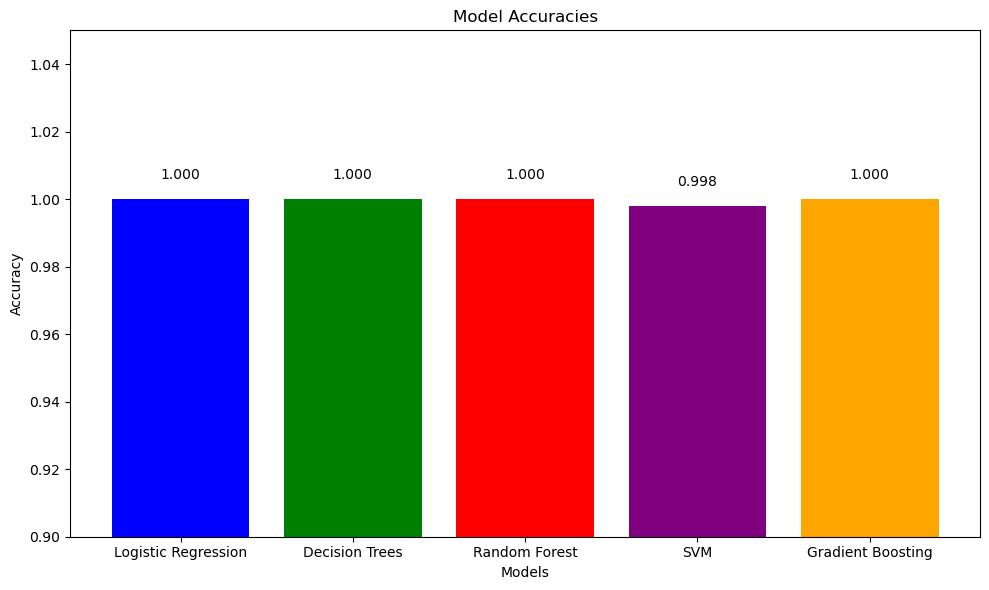

In [11]:
# Model names and their accuracies
model_names = ["Logistic Regression", "Decision Trees", "Random Forest", "SVM", "Gradient Boosting"]
accuracies = [1.0, 1.0, 1.0, 0.998, 1.0]

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(0.9, 1.05)
plt.xticks(rotation=0)

# Displaying the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f"{accuracy:.3f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()